In [ ]:
!pip install textblob wordcloud beautifulsoup4 matplotlib requests
import nltk
nltk.download('punkt')


In [ ]:
import requests

url = "https://www.airlinequality.com/airline-reviews/british-airways"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

print(response.status_code)  # Should be 200
print(response.text[:1000])  # Preview HTML


200
<!doctype html>

<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-GB">
<!--<![endif]-->

<head>
    <meta charset="utf-8">

    <title>British Airways Customer Reviews - SKYTRAX</title><link rel="preload" data-rocket-preload as="image" href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/nav/grad-header.jpg" fetchpriority="high">

    <!-- Google Chrome Frame for IE -->
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">

    <!-- mobile meta -->
    <meta name="HandheldFriendly" content="True">
    <meta name="MobileOptimized" content="320">
    <meta name="viewport"
        content="width=device-width, initial

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import time

def scrape_skytrax_reviews(pages=3):
    all_reviews = []
    headers = {"User-Agent": "Mozilla/5.0"}

    for page in range(1, pages + 1):
        url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{page}/?sortby=post_date%3ADesc"
        print(f"Scraping {url}...")
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, "html.parser")

        articles = soup.find_all("article", {"itemprop": "review"})

        if not articles:
            print("No reviews found on this page.")
            continue

        for article in articles:
            try:
                title = article.find("h2").text.strip()
                content = article.find("div", {"class": "text_content"}).text.strip()
                rating = len(article.find_all("span", class_="star fill"))
                date = article.find("time")["datetime"]
                all_reviews.append({
                    "title": title,
                    "content": content,
                    "rating": rating,
                    "date": date
                })
            except Exception as e:
                print("Error extracting a review:", e)

        time.sleep(1)  # to be nice to the server

    df = pd.DataFrame(all_reviews)
    return df

# Run the scraper
df = scrape_skytrax_reviews(pages=5)
print(f"Scraped {len(df)} reviews.")
df.head()



Scraping https://www.airlinequality.com/airline-reviews/british-airways/page/1/?sortby=post_date%3ADesc...
Scraping https://www.airlinequality.com/airline-reviews/british-airways/page/2/?sortby=post_date%3ADesc...
Scraping https://www.airlinequality.com/airline-reviews/british-airways/page/3/?sortby=post_date%3ADesc...
Scraping https://www.airlinequality.com/airline-reviews/british-airways/page/4/?sortby=post_date%3ADesc...
Scraping https://www.airlinequality.com/airline-reviews/british-airways/page/5/?sortby=post_date%3ADesc...
Scraped 50 reviews.


,title,content,rating,date
0,"""you can do better than this""",✅ Trip Verified | I really like flying Briti...,21,2025-04-18
1,"""downgraded to economy""",✅ Trip Verified | Could not book online the ...,7,2025-04-18
2,“staff were really engaged”,✅ Trip Verified | Having had some rough experi...,24,2025-04-16
3,"""got it right on this flight""",✅ Trip Verified | This comfortable flight wa...,24,2025-04-16
4,"""exceeded my expectations""",✅ Trip Verified | Punta Cana Terminal B chec...,24,2025-04-15


In [ ]:
df["content"] = df["content"].str.replace('\n', ' ').str.strip()


In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity
df["polarity"] = df["content"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment
df["sentiment"] = df["polarity"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

# Preview results
df[["title", "rating", "sentiment", "polarity"]].head()


,title,rating,sentiment,polarity
0,"""you can do better than this""",21,Positive,0.248872
1,"""downgraded to economy""",7,Negative,-0.151111
2,“staff were really engaged”,24,Positive,0.073148
3,"""got it right on this flight""",24,Positive,0.349184
4,"""exceeded my expectations""",24,Positive,0.207056


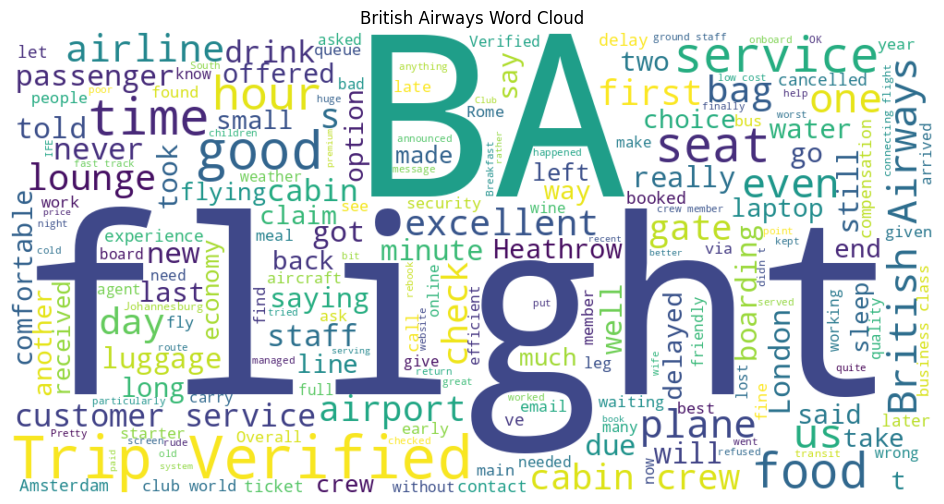

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all review content
text = " ".join(df["content"].tolist())

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text)

# Display
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("British Airways Word Cloud")
plt.show()


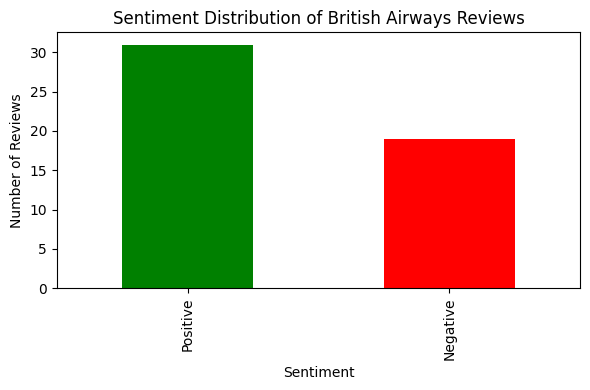

In [ ]:
# Sentiment bar chart
plt.figure(figsize=(6, 4))
df["sentiment"].value_counts().plot(kind='bar', color=["green", "red", "gray"])
plt.title("Sentiment Distribution of British Airways Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


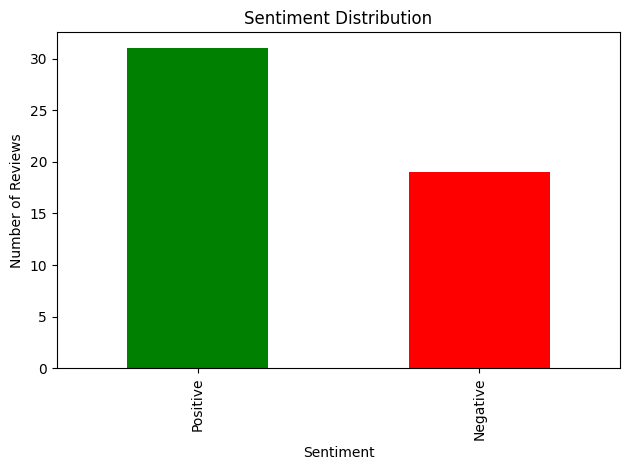

In [ ]:
# Save wordcloud
wordcloud.to_file("ba_wordcloud.png")

# Save sentiment bar chart
df["sentiment"].value_counts().plot(kind='bar', color=["green", "red", "gray"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.savefig("ba_sentiment_chart.png")


In [ ]:
from google.colab import files
files.download("ba_wordcloud.png")
files.download("ba_sentiment_chart.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving customer_booking.csv to customer_booking.csv


In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create a dummy DataFrame
num_records = 500

df = pd.DataFrame({
    "customer_id": range(1, num_records + 1),
    "age": np.random.randint(18, 70, size=num_records),
    "days_until_departure": np.random.randint(1, 90, size=num_records),
    "previous_bookings": np.random.randint(0, 10, size=num_records),
    "destination": np.random.choice(["Europe", "Asia", "North America", "South America", "Africa"], size=num_records),
    "booking_channel": np.random.choice(["Website", "Mobile App", "Travel Agent"], size=num_records),
    "membership_status": np.random.choice(["Bronze", "Silver", "Gold"], size=num_records),
    "price": np.random.randint(100, 2000, size=num_records),
    "holiday_purchase": np.random.choice([0, 1], size=num_records, p=[0.6, 0.4])  # 1 = bought holiday
})

df.to_csv("customer_bookings.csv", index=False)
df.head()


,customer_id,age,days_until_departure,previous_bookings,destination,booking_channel,membership_status,price,holiday_purchase
0,1,56,16,0,South America,Website,Silver,1851,0
1,2,69,61,0,South America,Website,Gold,1349,1
2,3,46,64,9,North America,Website,Silver,1081,0
3,4,32,63,5,Asia,Website,Gold,1254,0
4,5,60,69,4,Africa,Website,Gold,687,0


In [ ]:
df = pd.read_csv("customer_bookings.csv")
df.head()


,customer_id,age,days_until_departure,previous_bookings,destination,booking_channel,membership_status,price,holiday_purchase
0,1,56,16,0,South America,Website,Silver,1851,0
1,2,69,61,0,South America,Website,Gold,1349,1
2,3,46,64,9,North America,Website,Silver,1081,0
3,4,32,63,5,Asia,Website,Gold,1254,0
4,5,60,69,4,Africa,Website,Gold,687,0


In [ ]:
# Step 2: Preprocess the data

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=["destination", "booking_channel", "membership_status"], drop_first=True)

# Drop customer_id since it's not a feature
df_encoded = df_encoded.drop("customer_id", axis=1)

# Separate features and target
X = df_encoded.drop("holiday_purchase", axis=1)
y = df_encoded["holiday_purchase"]

# Show shape
print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")


Missing values:
 customer_id             0
age                     0
days_until_departure    0
previous_bookings       0
destination             0
booking_channel         0
membership_status       0
price                   0
holiday_purchase        0
dtype: int64
Feature shape: (500, 12)
Target shape: (500,)


In [ ]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 400
Testing samples: 100


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model training complete.")


✅ Model training complete.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.53

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.63      0.66        71
           1       0.24      0.28      0.25        29

    accuracy                           0.53       100
   macro avg       0.46      0.45      0.46       100
weighted avg       0.55      0.53      0.54       100


Confusion Matrix:
 [[45 26]
 [21  8]]


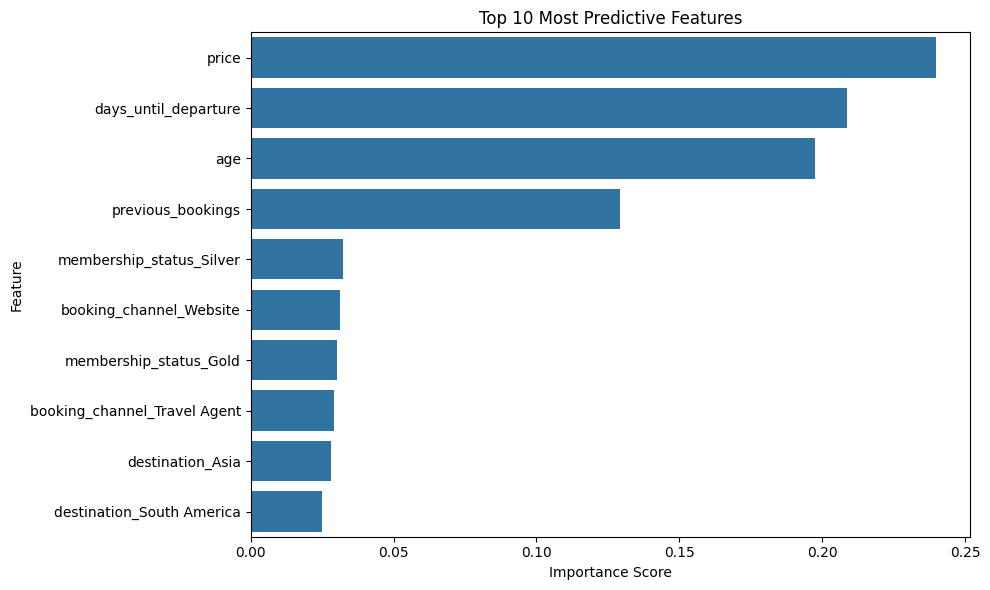

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importances from the trained model
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10])
plt.title("Top 10 Most Predictive Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
